In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras
import math
import numpy as np

print(tf.__version__)

1.9.0


In [2]:
%matplotlib inline

In [25]:
start = 0
end = 4
x = np.arange(0, 4,0.1)

In [4]:
import pandas as pd
df = pd.DataFrame(x)
df.head()

,0
0,0.0
1,0.1
2,0.2
3,0.3
4,0.4


In [22]:
def fenDuanFun(x):
    mid = int(len(x)/ 2)
    y = x[:mid] * 2
    
    z = x[mid:] + 2
#     np.concatenate()
    
    return np.append(y,z)

In [23]:
fenDuanFun(x)

array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,
        2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.1,
        4.2,  4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,
        5.3,  5.4,  5.5,  5.6,  5.7,  5.8,  5.9])

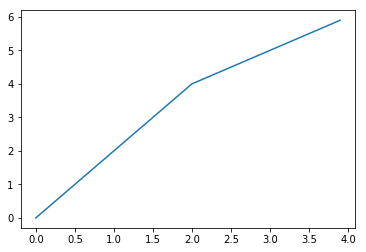

In [24]:
import matplotlib.pyplot as plt
plt.plot(x, fenDuanFun(x))

Training set: (40, 1)
Testing set:  (40, 1)


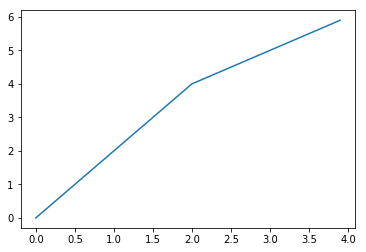

In [26]:
train_data = x.reshape(-1, 1)
train_labels = fenDuanFun(x).reshape(-1, 1)
m = train_data.shape[0]
plt.plot(train_data, train_labels)

print("Training set: {}".format(train_data.shape))  # 404 examples, 13 features
print("Testing set:  {}".format(train_labels.shape))

Testing set:  (40, 1)


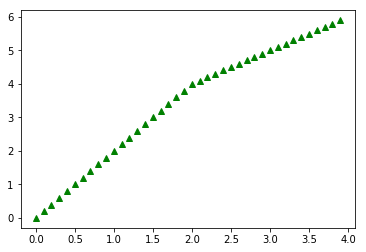

In [30]:
# Shuffle the training set
permutation = list(np.random.permutation(m))
train_data = train_data[permutation]
train_labels = train_labels[permutation]
plt.plot(train_data, train_labels,'g^')
print("Testing set:  {}".format(train_labels.shape))

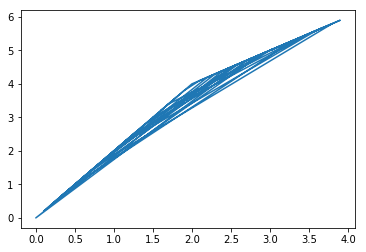

In [31]:
plt.plot(train_data, train_labels)

In [32]:
def build_model(network_layers= [2,1]):
  model = keras.Sequential([
    keras.layers.Dense(network_layers[0], activation=tf.nn.sigmoid,
                       input_shape=(train_data.shape[1],)),
    keras.layers.Dense(network_layers[1])
  ])

  optimizer = tf.train.RMSPropOptimizer(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
  return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 4         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500



In [34]:
# Store training stats
history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

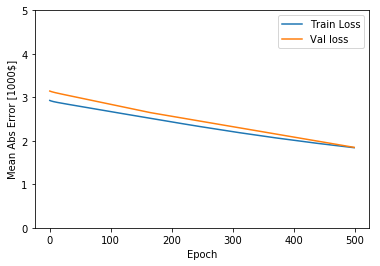

In [35]:
import matplotlib.pyplot as plt


def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [1000$]')
    plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
           label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
    plt.legend()
    plt.ylim([0, 5])
    plt.show()


plot_history(history)

In [39]:
model.summary()
print(model.trainable_weights)
print(model.get_weights())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 4         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________
[<tf.Variable 'dense/kernel:0' shape=(1, 2) dtype=float32>, <tf.Variable 'dense/bias:0' shape=(2,) dtype=float32>, <tf.Variable 'dense_1/kernel:0' shape=(2, 1) dtype=float32>, <tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32>]
[array([[ 1.73188257,  0.66614914]], dtype=float32), array([ 0.16354984,  0.48345867], dtype=float32), array([[ 0.75947326],
       [ 0.94700056]], dtype=float32), array([ 0.50202167], dtype=float32)]


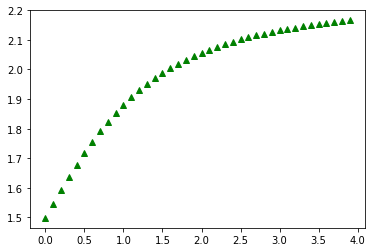

In [40]:
test_predictions = model.predict(train_data).flatten()

# plt.plot(train_data, train_labels,'g^')
plt.plot(train_data, test_predictions,'g^')

In [41]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

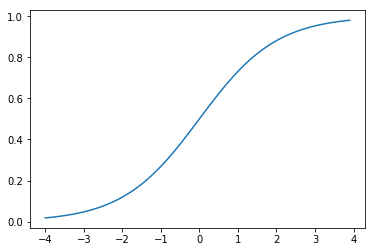

In [45]:
tmpX = np.arange(-4.0, 4,0.1)
plt.plot(tmpX, sigmoid(tmpX))

In [48]:
def MyNN(x):
    return 0.75*sigmoid(1.73*x+0.16)+0.94*sigmoid(0.66*x + 0.48 ) + 0.5
#?? 2x * sigmoid(1000x-2) + (x+2) * sigmoid(1000x-2)

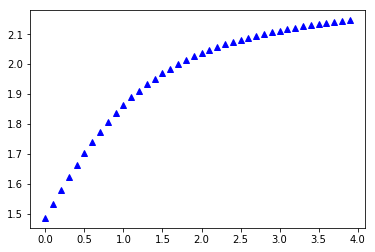

In [51]:
plt.plot(train_data, MyNN(train_data),'b^')

In [52]:
## Sigmoid 的参数
    y = 2*x  [0,2]
        x+2  [2,4]

    [<tf.Variable 'dense/kernel:0' shape=(1
     2) dtype=float32>
     <tf.Variable 'dense/bias:0' shape=(2
    ) dtype=float32>
     <tf.Variable 'dense_1/kernel:0' shape=(2
     1) dtype=float32>
     <tf.Variable 'dense_1/bias:0' shape=(1
    ) dtype=float32>]
    [array([[ 1.73188257
      0.66614914]]
     dtype=float32)
     array([ 0.16354984
      0.48345867]
     dtype=float32)


     array([[ 0.75947326]
           [ 0.94700056]]
     dtype=float32)
     array([ 0.50202167]
     dtype=float32)]

    w1 = 1.73  b1 = 0.16354984
    w1 = 0.66  b1 = 0.48

    w2 = [ 0.75947326, 0.94700056]
    b2 = 0.502



IndentationError: unexpected indent (<ipython-input-52-7a9b07c01c0f>, line 2)